In [11]:
# This is my Jupyter Notebook code-along whilst going through the course

# =================================================
# PYTHON FOR DATA SCIENCE ESSENTIAL TRAINING PART 1
# =================================================

# https://www.linkedin.com/learning/python-for-data-science-essential-training-part-1

#  How to get set up (Windows)
#  install python locally (version 3.11 for all users version at the time of writing)
#  -	navigate to C:\Program Files\Python311\Scripts via File Explorer
#  -	replace the address with cmd to open Command Prompt into that directory
#  -	pip install jupyter
#  -	install all python libraries needed
#    e.g.
#      pip install pandas
#      pip install numpy
#      pip install scikit-learn
#      pip install matplotlib
#      pip install seaborn
#  -	from any folder, open cmd, then type jupyter notebook to open it
#  -	create a new folder (it’ll be in the Python installation), then New > Python 3
#  -	add the folder to Quick Access

# =================================================

In [12]:
# -----------------------
# DATA PREPARATION BASICS
# -----------------------

import numpy as np
import pandas as pd

from pandas import Series, DataFrame

# label index vs integer index

series_obj = Series(np.arange(8), index=['row 1','row 2','row 3','row 4','row 5','row 6','row 7','row 8'])
series_obj

row 1    0
row 2    1
row 3    2
row 4    3
row 5    4
row 6    5
row 7    6
row 8    7
dtype: int32

In [13]:
series_obj['row 7']

6

In [14]:
series_obj[[0,7]]

row 1    0
row 8    7
dtype: int32

In [15]:
# create dataframe object
# note: passing in a seed e.g. 2, makes it return the same "random" results each time
np.random.seed(25)
DF_obj = DataFrame(np.random.rand(36).reshape((6,6)),
                   index=['row 1','row 2','row 3','row 4','row 5','row 6'],
                   columns=['column 1','column 2','column 3','column 4','column 5','column 6'])
DF_obj

,column 1,column 2,column 3,column 4,column 5,column 6
row 1,0.870124,0.582277,0.278839,0.185911,0.411100,0.117376
row 2,0.684969,0.437611,0.556229,0.367080,0.402366,0.113041
row 3,0.447031,0.585445,0.161985,0.520719,0.326051,0.699186
row 4,0.366395,0.836375,0.481343,0.516502,0.383048,0.997541
row 5,0.514244,0.559053,0.034450,0.719930,0.421004,0.436935
row 6,0.281701,0.900274,0.669612,0.456069,0.289804,0.525819


In [16]:
# .iloc indexer
DF_obj.loc[['row 2', 'row 5'], ['column 5','column 2']]

,column 5,column 2
row 2,0.402366,0.437611
row 5,0.421004,0.559053


In [17]:
# slicing via 2 index values separated by colon : e.g. firstvalue : lastvalue
# indexer gets everything in between

# example retrieve all data between rows 3 and 7
DF_obj['row 3':'row 7']

,column 1,column 2,column 3,column 4,column 5,column 6
row 3,0.447031,0.585445,0.161985,0.520719,0.326051,0.699186
row 4,0.366395,0.836375,0.481343,0.516502,0.383048,0.997541
row 5,0.514244,0.559053,0.034450,0.719930,0.421004,0.436935
row 6,0.281701,0.900274,0.669612,0.456069,0.289804,0.525819


In [18]:
# compare with scalars
# scalar: refers to a single numerical value
# use comparison operators to get records based on operator

DF_obj < .2

,column 1,column 2,column 3,column 4,column 5,column 6
row 1,False,False,False,True,False,True
row 2,False,False,False,False,False,True
row 3,False,False,True,False,False,False
row 4,False,False,False,False,False,False
row 5,False,False,True,False,False,False
row 6,False,False,False,False,False,False


In [19]:
# filter with scalers

DF_obj[DF_obj > 0.9]

,column 1,column 2,column 3,column 4,column 5,column 6
row 1,NaN,NaN,NaN,NaN,NaN,NaN
row 2,NaN,NaN,NaN,NaN,NaN,NaN
row 3,NaN,NaN,NaN,NaN,NaN,NaN
row 4,NaN,NaN,NaN,NaN,NaN,0.997541
row 5,NaN,NaN,NaN,NaN,NaN,NaN
row 6,NaN,0.900274,NaN,NaN,NaN,NaN


In [20]:
# set value with scalars
# select all records with specified label index, then set their values to a scalar
# e.g. set value on row 5 to the value of 420

series_obj['row 5'] = 420
series_obj

row 1      0
row 2      1
row 3      2
row 4      3
row 5    420
row 6      5
row 7      6
row 8      7
dtype: int32

In [21]:
# handling missing values
# better to use approximation, rather than drop fields wioth missing values altogether

missing = np.nan

series_obj = Series(['row 1', 'row 2', missing, 'row 4', 'row 5', 'row 6', missing, 'row 8'])
series_obj

0    row 1
1    row 2
2      NaN
3    row 4
4    row 5
5    row 6
6      NaN
7    row 8
dtype: object

In [22]:
# use isnull method

series_obj.isnull()

0    False
1    False
2     True
3    False
4    False
5    False
6     True
7    False
dtype: bool

In [23]:
# create a dataframe of random numbers

np.random.seed(25)
DF_obj = DataFrame(np.random.rand(36).reshape(6,6))
DF_obj

,0,1,2,3,4,5
0,0.870124,0.582277,0.278839,0.185911,0.411100,0.117376
1,0.684969,0.437611,0.556229,0.367080,0.402366,0.113041
2,0.447031,0.585445,0.161985,0.520719,0.326051,0.699186
3,0.366395,0.836375,0.481343,0.516502,0.383048,0.997541
4,0.514244,0.559053,0.034450,0.719930,0.421004,0.436935
5,0.281701,0.900274,0.669612,0.456069,0.289804,0.525819


In [24]:
# set certain coordinates in the dataframe to missing
# e.g. rows 3 to 5, at column 0

DF_obj.loc[3:5,0] = missing
DF_obj.loc[1:4,5] = missing
DF_obj

,0,1,2,3,4,5
0,0.870124,0.582277,0.278839,0.185911,0.411100,0.117376
1,0.684969,0.437611,0.556229,0.367080,0.402366,NaN
2,0.447031,0.585445,0.161985,0.520719,0.326051,NaN
3,NaN,0.836375,0.481343,0.516502,0.383048,NaN
4,NaN,0.559053,0.034450,0.719930,0.421004,NaN
5,NaN,0.900274,0.669612,0.456069,0.289804,0.525819


In [25]:
# replace missing values with specified value using fillna method

filled_DF = DF_obj.fillna(0)
filled_DF

,0,1,2,3,4,5
0,0.870124,0.582277,0.278839,0.185911,0.411100,0.117376
1,0.684969,0.437611,0.556229,0.367080,0.402366,0.000000
2,0.447031,0.585445,0.161985,0.520719,0.326051,0.000000
3,0.000000,0.836375,0.481343,0.516502,0.383048,0.000000
4,0.000000,0.559053,0.034450,0.719930,0.421004,0.000000
5,0.000000,0.900274,0.669612,0.456069,0.289804,0.525819


In [26]:
# create a dictionary using { }
# 0: column index position 0 are being set to value 0.1
# for missing values in column 5 will be set to value 1.25

filled_DF = DF_obj.fillna({0: 0.1, 5: 1.25})
filled_DF

,0,1,2,3,4,5
0,0.870124,0.582277,0.278839,0.185911,0.411100,0.117376
1,0.684969,0.437611,0.556229,0.367080,0.402366,1.250000
2,0.447031,0.585445,0.161985,0.520719,0.326051,1.250000
3,0.100000,0.836375,0.481343,0.516502,0.383048,1.250000
4,0.100000,0.559053,0.034450,0.719930,0.421004,1.250000
5,0.100000,0.900274,0.669612,0.456069,0.289804,0.525819


In [27]:
# pass in ffill method as an argument,
# it fills forward the last non-null value

fill_DF = DF_obj.fillna(method='ffill')
fill_DF

,0,1,2,3,4,5
0,0.870124,0.582277,0.278839,0.185911,0.411100,0.117376
1,0.684969,0.437611,0.556229,0.367080,0.402366,0.117376
2,0.447031,0.585445,0.161985,0.520719,0.326051,0.117376
3,0.447031,0.836375,0.481343,0.516502,0.383048,0.117376
4,0.447031,0.559053,0.034450,0.719930,0.421004,0.117376
5,0.447031,0.900274,0.669612,0.456069,0.289804,0.525819


In [28]:
# count number of missing values to find more problematic variables

np.random.seed(25)
DF_obj = DataFrame(np.random.rand(36).reshape(6,6))
DF_obj.loc[3:5,0] = missing
DF_obj.loc[1:4,5] = missing
DF_obj

,0,1,2,3,4,5
0,0.870124,0.582277,0.278839,0.185911,0.411100,0.117376
1,0.684969,0.437611,0.556229,0.367080,0.402366,NaN
2,0.447031,0.585445,0.161985,0.520719,0.326051,NaN
3,NaN,0.836375,0.481343,0.516502,0.383048,NaN
4,NaN,0.559053,0.034450,0.719930,0.421004,NaN
5,NaN,0.900274,0.669612,0.456069,0.289804,0.525819


In [29]:
DF_obj.isnull().sum()

0    3
1    0
2    0
3    0
4    0
5    4
dtype: int64

In [30]:
# filter out missing values using dropna() method
# this removes the entire row if any of its variables have a value

DF_no_NaN = DF_obj.dropna()
DF_no_NaN

,0,1,2,3,4,5
0,0.870124,0.582277,0.278839,0.185911,0.4111,0.117376


In [31]:
# remove entire column rather than the entire row
# pass argument axis = 1 to search the dataframe by column instead of row

DF_no_NaN = DF_obj.dropna(axis=1)
DF_no_NaN

,1,2,3,4
0,0.582277,0.278839,0.185911,0.411100
1,0.437611,0.556229,0.367080,0.402366
2,0.585445,0.161985,0.520719,0.326051
3,0.836375,0.481343,0.516502,0.383048
4,0.559053,0.034450,0.719930,0.421004
5,0.900274,0.669612,0.456069,0.289804


In [32]:
# remove duplicates to avoid skewed analysis
# e.g. repeat customer using different credit cards

DF_obj = DataFrame({'column 1':[1,1,2,2,3,3,3],
                    'column 2':['a','a','b','b','c','c','c'],
                    'column 3':['A','A','B','B','C','C','C']})
DF_obj

,column 1,column 2,column 3
0,1,a,A
1,1,a,A
2,2,b,B
3,2,b,B
4,3,c,C
5,3,c,C
6,3,c,C


In [33]:
# find duplicate rows based on previously assessed rows
# the first of a duplicate set is false because no dulpicates existed before

DF_obj.duplicated()

0    False
1     True
2    False
3     True
4    False
5     True
6     True
dtype: bool

In [34]:
# drop duplicates method for rows

DF_obj.drop_duplicates()

,column 1,column 2,column 3
0,1,a,A
2,2,b,B
4,3,c,C


In [35]:
# drop duplicate rows based on column values

DF_obj = DataFrame({'column 1':[1,1,2,2,3,3,3],
                    'column 2':['a','a','b','b','c','c','c'],
                    'column 3':['A','A','B','B','C','D','C']})
DF_obj

,column 1,column 2,column 3
0,1,a,A
1,1,a,A
2,2,b,B
3,2,b,B
4,3,c,C
5,3,c,D
6,3,c,C


In [36]:
DF_obj.drop_duplicates(['column 3'])

,column 1,column 2,column 3
0,1,a,A
2,2,b,B
4,3,c,C
5,3,c,D


In [37]:
# np.arange(36) tells Python to generate a range from 0 to 35
# .reshape(6,6) generates 6 rows by 6 columns

DF_obj = pd.DataFrame(np.arange(36).reshape(6,6))
DF_obj

,0,1,2,3,4,5
0,0,1,2,3,4,5
1,6,7,8,9,10,11
2,12,13,14,15,16,17
3,18,19,20,21,22,23
4,24,25,26,27,28,29
5,30,31,32,33,34,35


In [38]:
DF_obj_2 = pd.DataFrame(np.arange(15).reshape(5,3))
DF_obj_2

,0,1,2
0,0,1,2
1,3,4,5
2,6,7,8
3,9,10,11
4,12,13,14


In [39]:
# concatenating combines data from different sources into one table
# to join objects based on row index value,
# use concat method on sources to be joined then pass the axis = 1 argument
# this adds data as new columns

pd.concat([DF_obj, DF_obj_2], axis = 1 )

,0,1,2,3,4,5,0,1,2
0,0,1,2,3,4,5,0.0,1.0,2.0
1,6,7,8,9,10,11,3.0,4.0,5.0
2,12,13,14,15,16,17,6.0,7.0,8.0
3,18,19,20,21,22,23,9.0,10.0,11.0
4,24,25,26,27,28,29,12.0,13.0,14.0
5,30,31,32,33,34,35,NaN,NaN,NaN


In [40]:
# to concatenate based on column index values, Python adds data as new rows

pd.concat([DF_obj, DF_obj_2])

,0,1,2,3,4,5
0,0,1,2,3.0,4.0,5.0
1,6,7,8,9.0,10.0,11.0
2,12,13,14,15.0,16.0,17.0
3,18,19,20,21.0,22.0,23.0
4,24,25,26,27.0,28.0,29.0
5,30,31,32,33.0,34.0,35.0
0,0,1,2,NaN,NaN,NaN
1,3,4,5,NaN,NaN,NaN
2,6,7,8,NaN,NaN,NaN
3,9,10,11,NaN,NaN,NaN


In [41]:
# drop rows based on index
DF_obj.drop([0, 2])


,0,1,2,3,4,5
1,6,7,8,9,10,11
3,18,19,20,21,22,23
4,24,25,26,27,28,29
5,30,31,32,33,34,35


In [42]:
# drop columns based on index, by passing axis = 1
DF_obj.drop([0, 2], axis = 1)

,1,3,4,5
0,1,3,4,5
1,7,9,10,11
2,13,15,16,17
3,19,21,22,23
4,25,27,28,29
5,31,33,34,35


In [43]:
# creating a variable named added_variable, with new data
# to be joined with existing data source

series_obj = Series(np.arange(6))
series_obj.name = "added_variable"
series_obj

0    0
1    1
2    2
3    3
4    4
5    5
Name: added_variable, dtype: int32

In [44]:
# create a new variable named variable_added that combines both
# concatenate data using join method

variable_added = DataFrame.join(DF_obj, series_obj)
variable_added

,0,1,2,3,4,5,added_variable
0,0,1,2,3,4,5,0
1,6,7,8,9,10,11,1
2,12,13,14,15,16,17,2
3,18,19,20,21,22,23,3
4,24,25,26,27,28,29,4
5,30,31,32,33,34,35,5


In [45]:
# concatenate data using append method
# add a dataframe to itself
# ignore_index=False, prevents re-indexing the output i.e. retain original

# received warning for following output
added_datatable = variable_added.append(variable_added, ignore_index=False)
added_datatable

# "The frame.append method is deprecated and will be removed from pandas in a future version. 
#  Use pandas.concat instead."

C:\Users\Administrator\AppData\Local\Temp\2\ipykernel_984\1358223459.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  added_datatable = variable_added.append(variable_added, ignore_index=False)


,0,1,2,3,4,5,added_variable
0,0,1,2,3,4,5,0
1,6,7,8,9,10,11,1
2,12,13,14,15,16,17,2
3,18,19,20,21,22,23,3
4,24,25,26,27,28,29,4
5,30,31,32,33,34,35,5
0,0,1,2,3,4,5,0
1,6,7,8,9,10,11,1
2,12,13,14,15,16,17,2
3,18,19,20,21,22,23,3


In [46]:
# using pandas.concat instead of pandas.append
added_datatable = pd.concat([variable_added, variable_added], ignore_index=False)
added_datatable

,0,1,2,3,4,5,added_variable
0,0,1,2,3,4,5,0
1,6,7,8,9,10,11,1
2,12,13,14,15,16,17,2
3,18,19,20,21,22,23,3
4,24,25,26,27,28,29,4
5,30,31,32,33,34,35,5
0,0,1,2,3,4,5,0
1,6,7,8,9,10,11,1
2,12,13,14,15,16,17,2
3,18,19,20,21,22,23,3


In [47]:
# how to regenerate index for appended data
# by setting ignore_index=True

added_datatable = pd.concat([variable_added, variable_added], ignore_index=True)
added_datatable

,0,1,2,3,4,5,added_variable
0,0,1,2,3,4,5,0
1,6,7,8,9,10,11,1
2,12,13,14,15,16,17,2
3,18,19,20,21,22,23,3
4,24,25,26,27,28,29,4
5,30,31,32,33,34,35,5
6,0,1,2,3,4,5,0
7,6,7,8,9,10,11,1
8,12,13,14,15,16,17,2
9,18,19,20,21,22,23,3


In [48]:
# sort data using sort values method
# e.g. sort by column index 5 descending

DF_sorted = DF_obj.sort_values(by=(5), ascending=[False])
DF_sorted

,0,1,2,3,4,5
5,30,31,32,33,34,35
4,24,25,26,27,28,29
3,18,19,20,21,22,23
2,12,13,14,15,16,17
1,6,7,8,9,10,11
0,0,1,2,3,4,5


In [52]:
# grouping and data aggregation
# import an external dataset

# putting a spin on this exercise by pulling a file hosted on my GitHub
# instead of using the csv provided in the course
address = 'https://github.com/datamesse/data-visualisation-datasets/blob/main/Satellite%20launch%20overview/satellites-n2yo.csv?raw=true'
satellites = pd.read_csv(address)
satellites.columns = ['ID','norad_id','cospar_id','name','launch_date','flight_ended','status','destination','owner']

# retrieve first 5 rows by using head method
satellites.head()

,ID,norad_id,cospar_id,name,launch_date,flight_ended,status,destination,owner
0,0,1,1957-001A,SL-1 R/B,03 Oct 1957,01 Dec 1957,Decayed,NaN,Commonwealth of Independent States (former USSR)
1,1,2,1957-001B,SPUTNIK 1,03 Oct 1957,03 Jan 1958,Decayed,NaN,Commonwealth of Independent States (former USSR)
2,2,3,1957-002A,SPUTNIK 2,03 Nov 1957,14 Apr 1958,Decayed,NaN,Commonwealth of Independent States (former USSR)
3,3,4,1958-001A,EXPLORER 1,01 Feb 1958,30 Mar 1970,Decayed,NaN,United States
4,4,5,1958-002B,VANGUARD 1,17 Mar 1958,NaN,NaN,NaN,United States


In [69]:
# drop columns that cannot be used in aggregation after group by e.g. names
satellites_summary = satellites.drop(['ID','name','launch_date','flight_ended','destination','owner'], axis = 1)

# group by values in a column
satellites_groups = satellites_summary.groupby(satellites_summary['status'])

# aggregate numerical values
satellites_groups.count()

,norad_id,cospar_id
status,,
Backup/Standby,12,12
Decayed,27252,27252
Extended mission,6,6
Non-operational,1455,1455
Operational,6000,6000
Partially operational,49,49
Spare,7,7


In [70]:
# ----------------------
# DATA VISUALISATION 101
# ----------------------

# Visualisation types:
# Data storytelling - presentations to organisational decision makers
#                   - point must be made within first 5 to 15 seconds
#                   - i.e. higly focussed, no clutter, easy conclusion
# Data showcasing - presentations to analysts, scientists, engineers, etc.
#                 - let audience draw their own conclusions
#                 - give background information and context, be open-ended
# Data art - presentations to activists or general public
#          - make a statement, be provoking or inspiring

# Graph glossary:
# choropleth map = area map with boundries
# raster map = raster file (rectangular pattern of parallel lines)
#              using an X and Y grid filled with values coloured on count

# Thoughts before visualising
#  - list the questions the visualisation must answer
#  - select visualisation type
#  - which graphics are preferable
#  - test data graphics 
#    e.g. nested circles may be better than bar chart for marginal values

# use colour sparingly, only use it to draw attention to parts that matter
# choose based on colour formula e.g. https://colormind.io
# popular choices: monochromatic, analogous, complimentary
# example: https://www.datalabsagency.com

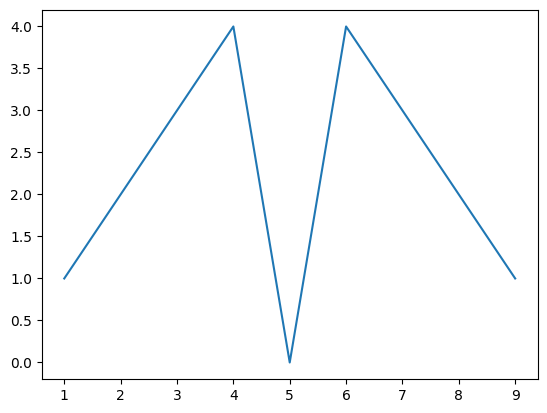

In [71]:
from numpy.random import randn
import matplotlib.pyplot as plt
from matplotlib import rcParams

# create linechart using matplotlib
# create a range of values for x and y axis
x = range(1,10)
y = [1,2,3,4,0,4,3,2,1]

plt.plot(x,y)

<AxesSubplot: xlabel='status'>

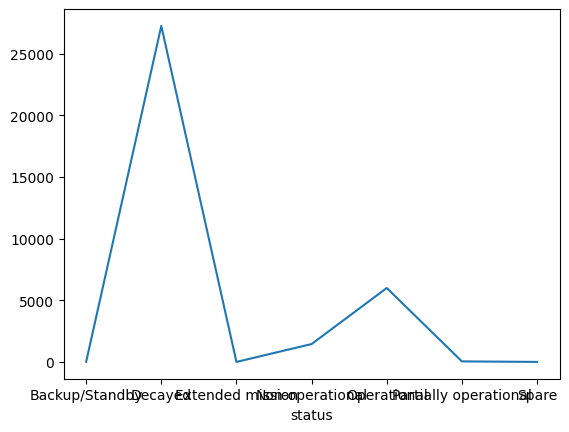

In [72]:
# isolate a variable form a dataframe
# .count() wouldn't be needed if the field was inherently quantitative

count_satellites = satellites_groups['norad_id'].count()
count_satellites.plot()

<AxesSubplot: >

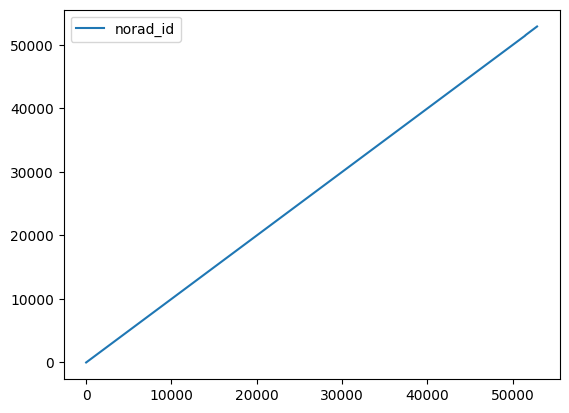

In [76]:
# TODO continue from here
df = satellites_summary[['norad_id']]
df.plot()

<BarContainer object of 9 artists>

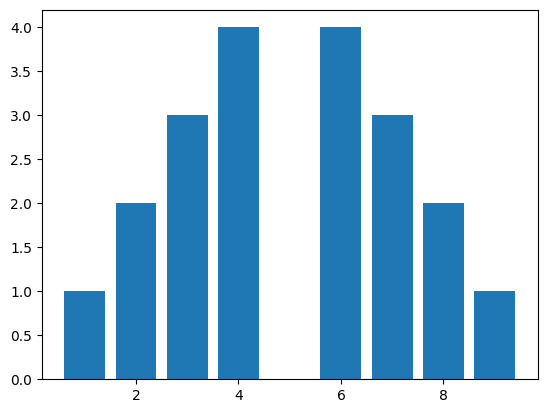

In [77]:
# create barchart using matplotlib
plt.bar(x,y)

In [ ]:
# create a bar chart from a pandas object using the bar function

## TODO figure out why this code does not work
satellites_groups.plot(kind="bar")
satellites_groups.plot(kind="barh")

In [ ]:
## TODO figure out why this code does not work
x = [1,2,3,4,0.5]
plt.pie(x)
plt.show()

In [ ]:
## TODO figure out why this code does not work
# save pie chart as an image
plt.pie(x)
plt.savefig('pie_chart.png')
plt.show()

In [4]:
## TODO figure out why this code does not work
# find current directory
$pwd

SyntaxError: invalid syntax (1932168652.py, line 2)

In [ ]:
# define plot elements with matplotlib
# 2 methods: functional or obect-orientated

# examples above are based on functional plot building
# examples below are object orientated
#   Steps: 1. create blank figre
#          2. add axes to figure
#          3. generate plots within figure object
#          4. specify plot and layout parameters

# subplot: figure with one or more plots

import numpy as np
from numpy.random import
# to ensure matplotlib charts print neatly in Jupyter Notebook,
%matplotlib inline



In [ ]:
import numpy